<h1 style="color: #4285F4;">Cyclistic</h1>

<h3 style="color: #EA4335;">Bicicletas compartidas</h3>

<h2>Caso final del 
<span style="color: black; font-size: 1.5em;">Certificado</span>    
<span style="color: #4285F4; font-size: 1.5em;">G</span>
<span style="color: #EA4335; font-size: 1.5em;">o</span>
<span style="color: #FBBC05; font-size: 1.5em;">o</span>
<span style="color: #4285F4; font-size: 1.5em;">g</span>
<span style="color: #34A853; font-size: 1.5em;">l</span>
<span style="color: #EA4335; font-size: 1.5em;">e</span>
<span style="color: black; font-size: 1.0em;">:</span>
</h2>

<h1>Análisis computacional de datos</h1>

<h3><span style="color: #FBBC05;">por</span> <span style="color: black;">Joaquín Olea Ibarra</span></h3>
<br><br><br>

# Parte II: Análisis Exploratorio y Comparativo de Usuarios

**Objetivos:**

* Explorar Patrones de Uso: Investigar cómo difieren los patrones de uso entre usuarios casuales y con membresía en términos de elección de tipo de bicicleta, duración del viaje, frecuencia, preferencias de horarios, y estacionalidad.

* Identificar Diferencias Clave: Distinguir las características distintivas en el comportamiento y las preferencias de viaje entre los dos grupos de usuarios.

--> Metodología:

* Análisis Descriptivo: Utilizar estadísticas descriptivas para resumir y entender las características de los datos, enfocándose en diferencias entre grupos.

* Visualización de Datos: Crear visualizaciones como histogramas, gráficos de caja, y mapas de calor para ilustrar las diferencias y similitudes en el comportamiento de usuarios casuales y con membresía.

* Análisis Temporal: Investigar cómo la utilización de las bicicletas varía por hora del día, día de la semana, y mes del año entre los dos tipos de usuarios.

* Análisis Geoespacial: Explorar patrones geográficos en el uso de bicicletas para identificar áreas de alta demanda por parte de usuarios casuales que podrían ser objetivos para la conversión a membresía.

--> Entregables:

* Informe de Análisis Exploratorio: Un documento detallado que presenta los hallazgos del análisis, incluyendo estadísticas resumidas y visualizaciones clave.

In [1]:
import pandas as pd
trips = pd.read_parquet("trips_2022_clean.parquet")

## 8. Preferencias de Bicicleta por Tipo de Usuario

En el servicio de bicicletas compartidas de Divvy Chicago, los usuarios tienen la opción de elegir entre bicicletas eléctricas y clásicas. Este apartado explora las preferencias entre estos dos tipos de bicicletas, distinguiendo entre usuarios casuales y miembros, para entender mejor sus patrones de uso y cómo estos podrían influir en estrategias para incrementar la membresía.

Utilizando los datos de viajes recopilados durante el año 2022, se realizó un análisis detallado para comparar la frecuencia de uso entre bicicletas clásicas y eléctricas, segmentado por tipo de usuario. Los resultados se resumen en la "Tabla 1", que muestra la distribución del uso de bicicletas por tipo de usuario, y se visualizan en el "Gráfico 1", destacando la preferencia por tipo de bicicleta.

In [2]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Agrupar por 'user_type' y 'bike_type', luego contar
grouped = trips.groupby(['user_type', 'bike_type'], observed=True).size().reset_index(name='count')

# Pivotear para obtener 'bike_type' como columnas y 'user_type' como filas
pivot_table = grouped.pivot_table(index='user_type', columns='bike_type', values='count', fill_value=0)

# Agregar columnas y filas de totales
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table['classic_%'] = (pivot_table['classic_bike']/pivot_table['total'])*100
pivot_table['electric_%'] = (pivot_table['electric_bike']/pivot_table['total'])*100
pivot_table.loc['total', pivot_table\
                        .columns.difference(['classic_%', 'electric_%'])] = pivot_table.sum()
pivot_table.loc['total', ['classic_%', 'electric_%']] = np.nan

# Re-arreglar orden
pivot_table = pivot_table[['classic_bike', 'classic_%', 'electric_bike', 'electric_%', 'total']]

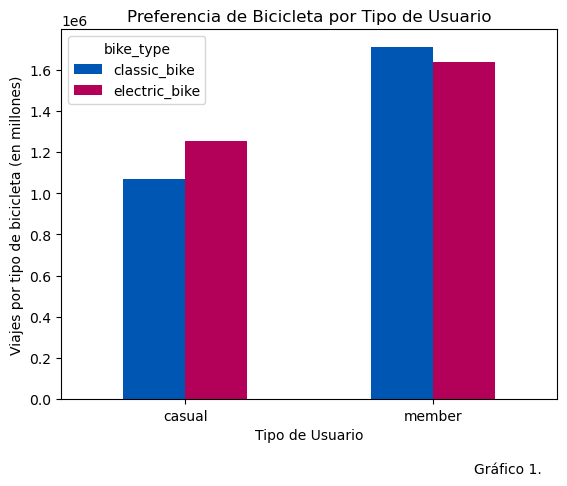

In [3]:
import matplotlib.pyplot as plt

# Eliminar la fila y columna de totales para la visualización
plot_data = pivot_table[['classic_bike', 'electric_bike']]
plot_data = plot_data.drop(index='total')

# Definir colores específicos
color_classic = "#0056b3"  # Un tono de azul similar al de las Divvy Classic Bikes
color_electric = "#b30059"  # Rosa oscuro

# Crear un gráfico de barras
plot_data.plot(kind='bar', color=[color_classic, color_electric])

# Configurar títulos y etiquetas
plt.title('Preferencia de Bicicleta por Tipo de Usuario')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Viajes por tipo de bicicleta (en millones)')
plt.xticks(rotation=0)  # Rota las etiquetas del eje x para mejor legibilidad

# Etiqueta gráfico 1. 
plt.text(x=0.9, y=-0.2, s='Gráfico 1.', fontsize=10, ha='center', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()


In [4]:
from tabulate import tabulate

# Formatear las columnas numéricas para usar separadores de miles
for col in pivot_table.select_dtypes(include=['float', 'int']):
    pivot_table[col] = pivot_table[col].apply(lambda x: f"{x:,.0f}" if np.isfinite(x) else x)
    
print()
print("--> Preferencia de bicicleta por tipo de usuario\n")
# Mostrar el resultado usando tabulate
print(tabulate(pivot_table, headers='keys', tablefmt='psql', floatfmt=".0f", showindex=True))

texto = "Tabla 1."
print()
print(texto.rjust(90))  # Alinea a la derecha en un espacio de 90 caracteres



--> Preferencia de bicicleta por tipo de usuario

+-------------+----------------+-------------+-----------------+--------------+-----------+
| user_type   | classic_bike   |   classic_% | electric_bike   |   electric_% | total     |
|-------------+----------------+-------------+-----------------+--------------+-----------|
| casual      | 1,068,917      |          46 | 1,253,060       |           54 | 2,321,977 |
| member      | 1,709,743      |          51 | 1,635,897       |           49 | 3,345,640 |
| total       | 2,778,660      |         nan | 2,888,957       |          nan | 5,667,617 |
+-------------+----------------+-------------+-----------------+--------------+-----------+

                                                                                  Tabla 1.


**Preferencia de Bicicleta por Tipo de Usuario:**

* Los usuarios casuales tienden a preferir las bicicletas eléctricas sobre las clásicas, con un 54% de sus viajes realizados en bicicletas eléctricas.

* Por otro lado, los miembros muestran una preferencia ligeramente mayor por las bicicletas clásicas, con un 51% de sus viajes en este tipo de bicicletas.

**Uso Total:**

* El total de viajes indica que los miembros hacen más uso de ambos tipos de bicicletas, con 3,345,640 viajes en total, en comparación con los 2,321,977 viajes realizados por usuarios casuales.

**Distribución del Uso de Bicicletas:**

* La distribución del uso entre bicicletas clásicas y eléctricas es relativamente equilibrada para ambos tipos de usuarios, aunque con una ligera preferencia hacia el tipo de bicicleta que más usan (eléctricas para casuales y clásicas para miembros).

**Totales Generales:**

* El total general de usos de bicicletas es de 5,667,617, con una ligera preferencia global hacia las bicicletas eléctricas (2,888,957 usos) sobre las clásicas (2,778,660 usos).

**Implicaciones:**

* Esta distribución puede reflejar diferentes necesidades o preferencias entre los usuarios casuales y los miembros. Por ejemplo:
  
    * los usuarios casuales podrían preferir bicicletas eléctricas por la facilidad de uso y menor esfuerzo requerido, lo cual podría ser especialmente atractivo para viajes esporádicos o turistas.
      
    * Por otro lado, los miembros, posiblemente utilizando el servicio con mayor regularidad, podrían preferir bicicletas clásicas por razones de coste, ejercicio físico o disponibilidad.
  
* La preferencia por las bicicletas eléctricas indica una tendencia hacia la búsqueda de comodidad y eficiencia en el transporte, lo cual podría ser un punto importante para considerar en la planificación de servicios de bicicletas compartidas, especialmente en áreas con topografía variada donde las bicicletas eléctricas pueden ofrecer ventajas significativas sobre las clásicas.

La 'tabla 1' ofrece una visión clara de cómo se distribuye la preferencia de bicicletas entre diferentes tipos de usuarios y podría ser útil para tomar decisiones estratégicas en la gestión de flotas de bicicletas compartidas, marketing dirigido y mejoras en el servicio.

## 9. Días de Uso

**Introducción**

La adaptación a modalidades de trabajo flexibles tras la pandemia de Covid-19 ha modificado los patrones de uso de medios de transporte, incluyendo las bicicletas Divvy en Chicago. Este apartado analiza cómo estos cambios han influenciado el comportamiento de usuarios casuales y miembros en relación al uso de bicicletas a lo largo de la semana.

**Análisis de Días de Uso**

Durante la semana laboral, los miembros tienden a utilizar las bicicletas con más frecuencia entre martes y jueves, sugiriendo un uso predominante para desplazamientos laborales. En contraste, los usuarios casuales presentan una menor frecuencia de uso en estos días. Los fines de semana, especialmente los sábados, se observa un incremento en el uso de bicicletas por usuarios casuales, resaltando su preferencia por actividades recreativas. Esta tendencia se invierte en los miembros, quienes reducen su uso, particularmente el domingo.

**Visualizaciones y Tabulaciones de Datos**

Las visualizaciones, como el Gráfico 2 y Gráfico 3, junto con la Tabla 2, ilustran estas diferencias en el uso de bicicletas entre días laborales y fines de semana, y entre tipos de usuario. Resaltan una elección consistente en el tipo de bicicleta, sin importar el día de la semana: miembros prefieren bicicletas clásicas, mientras que usuarios casuales optan más por bicicletas eléctricas, sobre todo en fines de semana.

##### Cambio de nombre de columna 'week_day'

In [5]:
# Vamos a darle un nombre más asertivo a la columna que contiene el día de la semana
trips = trips.rename(columns={'week_day': 'day_of_week'})

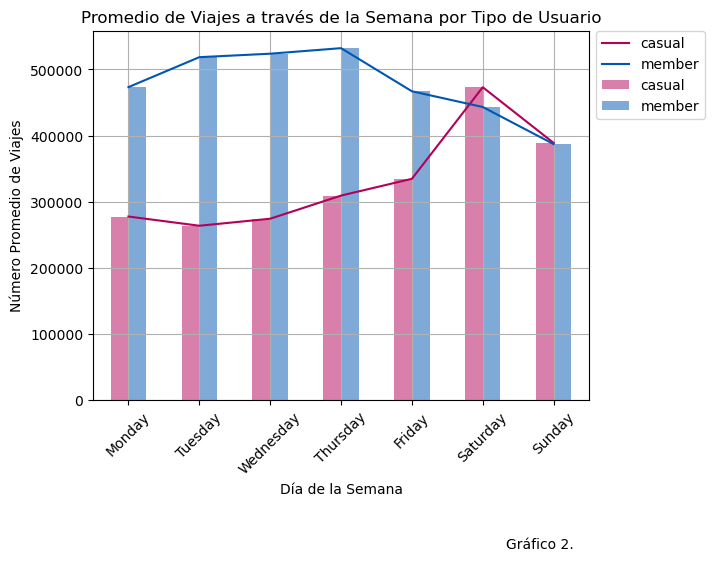

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por 'week_day' y 'bike_type', y contar las ocurrencias
daily_bike_usage = trips.groupby(['day_of_week', 'user_type'], observed=False).size().unstack()

# Reordenar los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_bike_usage = daily_bike_usage.reindex(ordered_days)

# Colores para los tipos de usuario
color_barras = ["#b30059", "#0056b3"]  # Tonos pálidos de naranja y azul para las barras
color_lineas = ["#b30059", "#0056b3"]  # Tonos oscuros para las líneas

# Crear el gráfico de barras apiladas con colores más pálidos
ax = daily_bike_usage.plot(kind='bar', stacked=False, color=color_barras, alpha=0.5)

# Agregar un gráfico de líneas con colores más oscuros
daily_bike_usage.plot(kind='line', color=color_lineas, ax=ax)

# Mover la leyenda fuera del gráfico, a la derecha
ax.legend(loc='center left', bbox_to_anchor=(1, 0.88))

plt.title('Promedio de Viajes a través de la Semana por Tipo de Usuario')
plt.xlabel('Día de la Semana')
plt.ylabel('Número Promedio de Viajes')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar etiqueta
plt.text(x=0.9, y=-0.4, s='Gráfico 2.', fontsize=10, ha='center', transform=ax.transAxes)

plt.show()


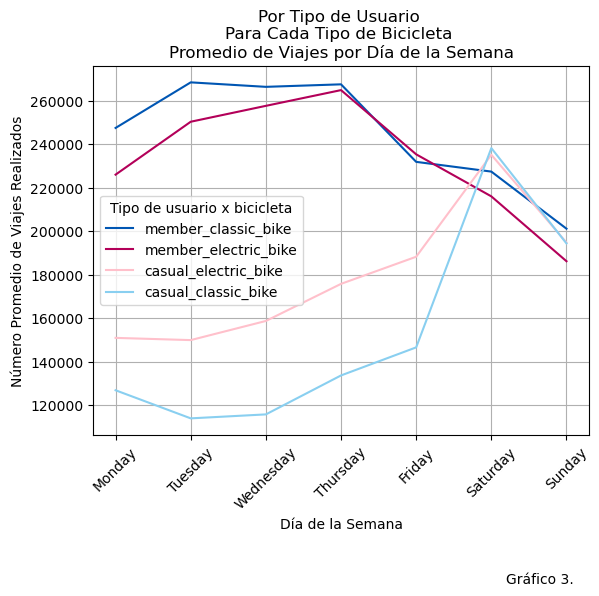

In [7]:
import pandas as pd

# Agrupar por 'week_day', 'user_type', y 'bike_type' y contar las ocurrencias
grouped = trips.groupby(['day_of_week', 'user_type', 'bike_type'], observed=False).size()

# Desapilar los niveles para convertirlos en columnas
unstacked = grouped.unstack(level=['user_type', 'bike_type'])

# Renombrar las columnas según tus especificaciones
unstacked.columns = ['_'.join(col).strip() for col in unstacked.columns.values]

# Reordenar los días de la semana
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_bike_usage = unstacked.reindex(ordered_days)

# Colores definidos
color_classic_member = "#0056b3"  # Azul Oscuro
color_classic_casual = "#89CFF0"  # Azul Claro
color_electric_member = "#b30059"  # Rosa Oscuro
color_electric_casual = "#FFC0CB"  # Rosa Claro

# Cambiar orden de columnas
daily_bike_usage = daily_bike_usage[['member_classic_bike', 
                                     'member_electric_bike', 
                                     'casual_electric_bike', 
                                     'casual_classic_bike']]
# Crear la gráfica de líneas
daily_bike_usage.plot(kind='line',color=[color_classic_member, 
                                     color_electric_member, 
                                     color_electric_casual, 
                                     color_classic_casual])
plt.title('Por Tipo de Usuario \nPara Cada Tipo de Bicicleta \nPromedio de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número Promedio de Viajes Realizados')
plt.legend(title='Tipo de usuario x bicicleta')
plt.xticks(rotation=45)
plt.grid(True)

# Etiqueta gráfico 3. 
plt.text(x=0.9, y=-0.4, s='Gráfico 3.', fontsize=10, ha='center', transform=plt.gca().transAxes)

plt.show()


In [8]:
from tabulate import tabulate

# Sumar a través de las columnas para cada fila (total diario por tipo de bicicleta)
daily_bike_usage['total'] = daily_bike_usage.sum(axis=1)

# Sumar a través de las filas para cada columna (total por tipo de bicicleta en todos los días)
daily_bike_usage.loc['total'] = daily_bike_usage.drop('total', axis=1).sum()

# Formatear las columnas numéricas para usar separadores de miles
for col in daily_bike_usage.select_dtypes(include=['float', 'int']):
    daily_bike_usage[col] = daily_bike_usage[col].apply(lambda x: f"{x:,.0f}" if np.isfinite(x) else x)

daily_bike_usage = daily_bike_usage.rename(columns={'casual_classic_bike':'casual_classic',\
                                                    'casual_electric_bike':'casual_electric',\
                                                    'member_classic_bike':'member_classic',\
                                                    'member_electric_bike':'member_electric'})
                                                    
print()
print("--> Preferencia de bicicleta por tipo de usuario\n")
# Mostrar el resultado usando tabulate
print(tabulate(daily_bike_usage, headers='keys', tablefmt='psql', floatfmt=".0f", showindex=True))

texto = "Tabla 2."
print()
print(texto.rjust(100))  # Alinea a la derecha en un espacio de 100 caracteres


--> Preferencia de bicicleta por tipo de usuario

+---------------+------------------+-------------------+-------------------+------------------+---------+
| day_of_week   | member_classic   | member_electric   | casual_electric   | casual_classic   | total   |
|---------------+------------------+-------------------+-------------------+------------------+---------|
| Monday        | 247,401          | 225,934           | 150,879           | 126,792          | 751,006 |
| Tuesday       | 268,362          | 250,256           | 149,856           | 113,875          | 782,349 |
| Wednesday     | 266,300          | 257,567           | 158,656           | 115,698          | 798,221 |
| Thursday      | 267,454          | 264,801           | 175,716           | 133,611          | 841,582 |
| Friday        | 231,809          | 235,274           | 188,186           | 146,512          | 801,781 |
| Saturday      | 227,332          | 215,942           | 235,058           | 238,127          | 916,4

**Observaciones**

El análisis refleja un patrón de uso diferenciado entre días laborales y fines de semana, indicando una oportunidad para promover el uso de bicicletas en días específicos y para fines particulares, como el desplazamiento al trabajo o el ocio.

**Conclusiones Preliminares**

La evaluación de los patrones de uso diario de las bicicletas Divvy destaca variaciones claras entre usuarios casuales y miembros. Comprender estos patrones permite dirigir mejor las iniciativas para fomentar el uso de bicicletas, adaptándolas a las necesidades y preferencias de cada grupo de usuarios.

### 10. HORARIOS DE USO

**Introducción**

Este análisis profundiza en cómo los patrones de uso de bicicletas Divvy varían según el día de la semana y la hora del día, diferenciados por tipo de usuario (usuarios casuales vs. miembros) y tipo de bicicleta (clásica vs. eléctrica). 

Los gráficos 5 y 6 proporcionan una visión general de estos patrones para usuarios casuales y miembros, respectivamente, mientras que los gráficos 7 al 13 desglosan el uso por tipo de miembro y tipo de bicicleta para cada día de la semana, ofreciendo una visión detallada de las preferencias y comportamientos de ciclismo en la ciudad de Chicago.

**Observaciones Generales**

A través de los gráficos 5 y 6, se observan claras diferencias en los patrones de uso entre usuarios casuales y miembros, que se detallan aún más en los gráficos 7 al 13:

* Usuarios Casuales (Gráfico 5): Los usuarios casuales muestran un uso más distribuido a lo largo del día, con un aumento notable en las horas de la tarde, especialmente entre las 12 pm y las 6 pm. Esto puede indicar una preferencia por usar las bicicletas para actividades recreativas o turísticas durante el día.

* Miembros (Gráfico 6): Demuestran un uso más intensivo en las horas de desplazamiento laboral durante días laborables, evidenciando la bicicleta como un medio de transporte esencial para sus rutinas diarias.

* Los miembros utilizan las bicicletas de manera más intensiva durante las horas de inicio y fin de la jornada laboral, lo que sugiere un uso significativo de las bicicletas para desplazamientos al trabajo. Esto se evidencia en los picos de uso a las 7-9 am y nuevamente a las 4-6 pm. ¿Uso predominante para el commuting?

* Aunque el uso disminuye notablemente durante las horas nocturnas y de madrugada para ambos tipos de usuarios, sigue habiendo una presencia significativa de viajes, especialmente en bicicletas eléctricas. Esto puede reflejar la conveniencia de las bicicletas eléctricas para desplazamientos nocturnos, posiblemente debido a una menor disponibilidad de otros medios de transporte durante estas horas.

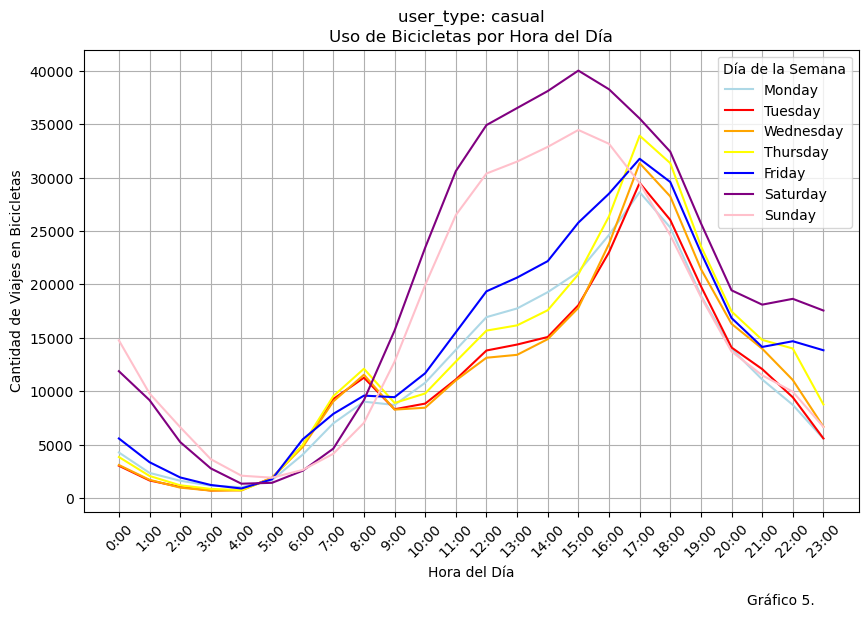

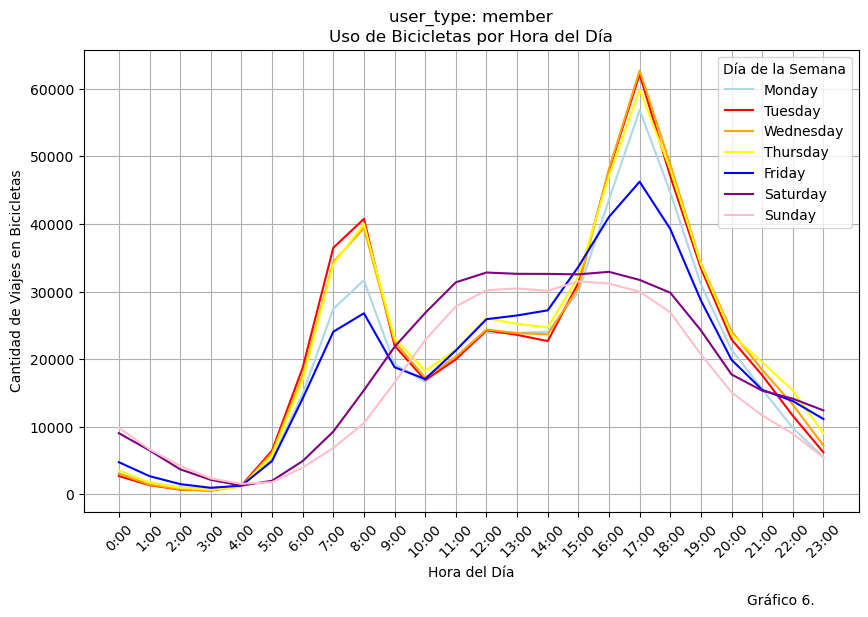

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Extraer la hora y el día de la semana
trips['hour_of_day'] = trips['start_datetime'].dt.hour

# Agrupar por día de la semana, hora y tipo de bicicleta
grouped = trips.groupby(['day_of_week', 'hour_of_day', 'user_type'], observed=True).size().unstack()

# Días de la semana
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Definir colores para cada día de la semana
colors = {
    'Monday': '#add8e6',     # Azul claro
    'Tuesday': '#ff0000',    # Rojo
    'Wednesday': '#ffa500',  # Naranja
    'Thursday': '#ffff00',   # Amarillo
    'Friday': '#0000ff',     # Azul oscuro
    'Saturday': '#800080',   # Púrpura
    'Sunday': '#ffc0cb'      # Rosa
}

# Tipos de usuario (ajustar según tus datos)
user_types = ['casual', 'member']

# Crear gráficos
num = 5
for user_type in user_types:
    plt.figure(figsize=(10, 6))
    for day in days_of_week:
        if day in grouped.index.levels[0]:  # Verificar si el día está en los datos
            daily_data = grouped.loc[day, user_type]
            plt.plot(daily_data, label=day, color=colors[day])

    plt.title(f'user_type: {user_type}\nUso de Bicicletas por Hora del Día')
    plt.xlabel('Hora del Día')
    plt.ylabel('Cantidad de Viajes en Bicicletas')
    plt.xticks(range(0, 24), [f"{hour}:00" for hour in range(0, 24)])
    plt.legend(title='Día de la Semana')
    plt.xticks(rotation=45)
    plt.grid(True)

    # Etiquetas gráfico 5 y 6 
    plt.text(x=0.9, y=-0.2, s= f'Gráfico {num}.', fontsize=10, ha='center', transform=plt.gca().transAxes)
    plt.show()
    num += 1

**Observaciones Específicas para el Fin de Semana**

Los patrones de uso de bicicletas Divvy durante el fin de semana, ilustrados en los gráficos 12 y 13 para el sábado y domingo respectivamente, revelan dinámicas de uso distintas de las observadas durante la semana laboral, reflejando cómo las preferencias y comportamientos de ciclismo se adaptan a un contexto más orientado al ocio y actividades recreativas.

**Usuarios Casuales:**

* Durante el fin de semana, los usuarios casuales exhiben un marcado incremento en el uso de bicicletas a lo largo del día, con una actividad especialmente intensa desde media mañana hasta las primeras horas de la tarde. Este patrón sugiere una fuerte preferencia por las bicicletas compartidas para explorar la ciudad, realizar actividades recreativas al aire libre, o como medio de transporte para asistir a eventos y reuniones sociales.

* La preferencia por bicicletas eléctricas se mantiene alta, posiblemente debido a la búsqueda de experiencias de ciclismo más relajadas y menos exigentes físicamente, que permitan a los usuarios disfrutar plenamente de sus actividades de ocio sin el desgaste que podría implicar el uso de bicicletas clásicas.

**Miembros:**

* A diferencia de los días laborables, los miembros presentan un uso más homogéneo de bicicletas a lo largo del día, sin los picos pronunciados de actividad observados durante las horas de desplazamiento al trabajo. Esto indica un cambio en la utilización de las bicicletas, pasando de un medio de transporte diario a una opción para actividades de ocio y ejercicio durante el fin de semana.
  
* Aunque el uso por parte de los miembros disminuye en comparación con los días laborables, sigue siendo significativo, lo que sugiere que las bicicletas compartidas son una opción popular no solo para el desplazamiento sino también para disfrutar del tiempo libre.

**Actividad Nocturna y de Madrugada:**

La actividad nocturna y de madrugada durante el fin de semana muestra un patrón interesante, con un uso continuado de bicicletas, tanto clásicas como eléctricas, por parte de usuarios casuales y miembros. Esto podría reflejar la participación en actividades sociales nocturnas, así como la conveniencia de las bicicletas compartidas como opción de regreso a casa después de eventos o encuentros sociales.

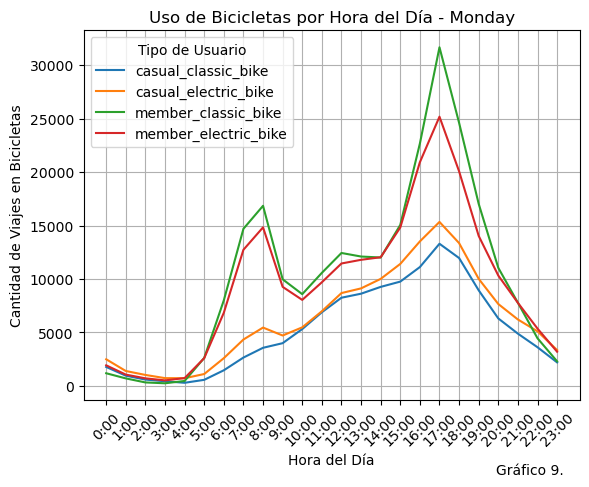

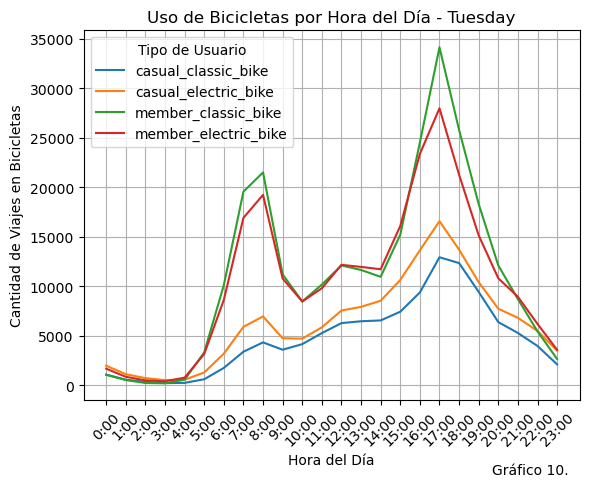

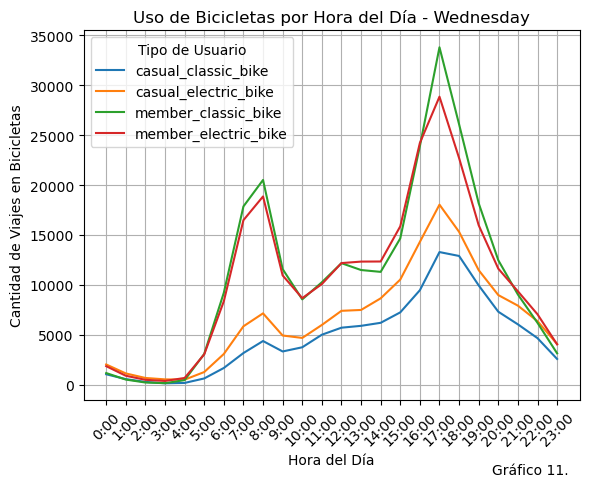

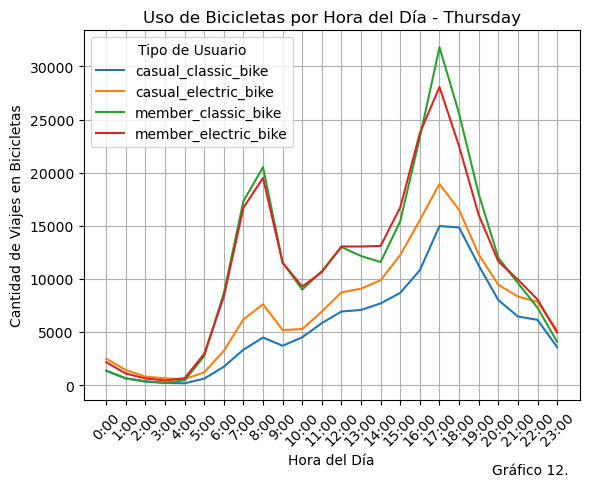

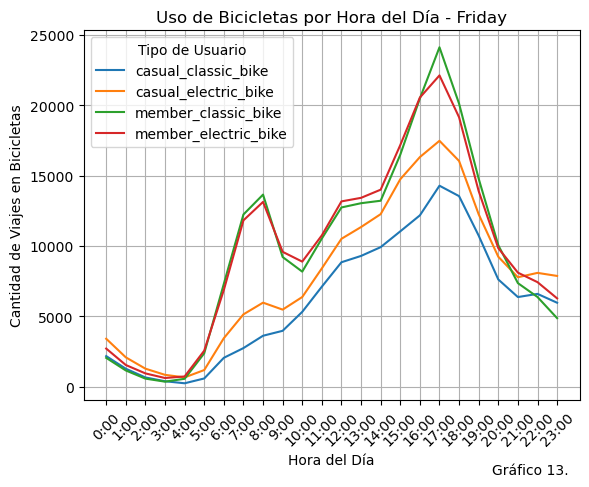

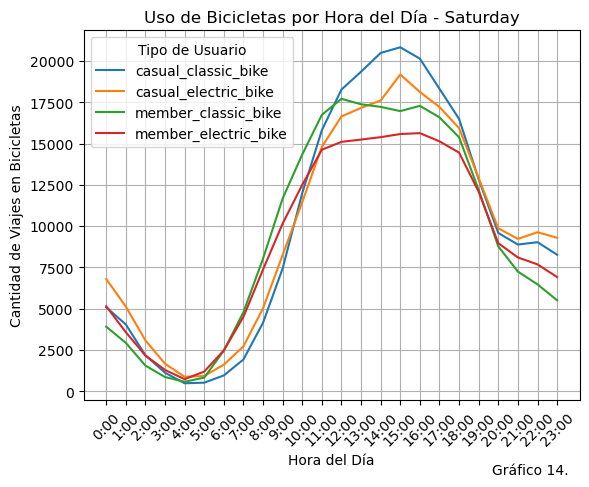

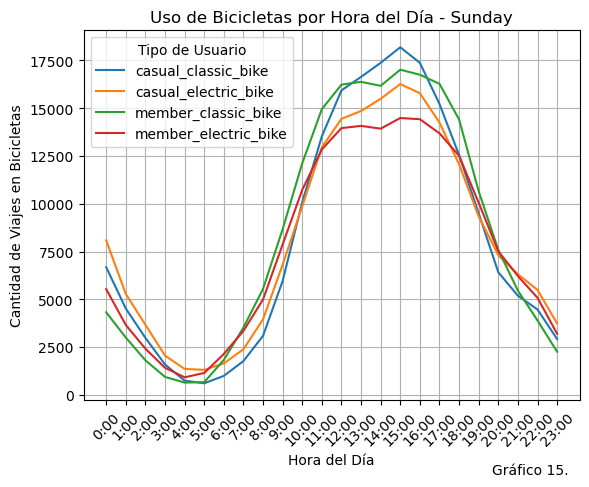

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar por día de la semana, hora y tipo de bicicleta
grouped = trips.groupby(['day_of_week', 'hour_of_day', 'user_type', 'bike_type'], observed=True).size()

# Desapilar los niveles para convertirlos en columnas
unstacked = grouped.unstack(level=['user_type', 'bike_type'])

# Renombrar las columnas según tus especificaciones
unstacked.columns = ['_'.join(col).strip() for col in unstacked.columns.values]

# Lista de días de la semana en orden
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear un gráfico para cada día de la semana
num = 9
for day in days_of_week:
    daily_data = unstacked.loc[day]

    # Si el día no tiene datos, continúa con el siguiente
    if daily_data.empty:
        continue

    daily_data.plot(kind='line')
    plt.title(f'Uso de Bicicletas por Hora del Día - {day}')
    plt.xlabel('Hora del Día')
    plt.ylabel('Cantidad de Viajes en Bicicletas')
    plt.xticks(range(0, 24), [f"{hour}:00" for hour in range(0, 24)])
    plt.legend(title='Tipo de Usuario')
    plt.xticks(rotation=45)
    plt.grid(True)
    
    # Etiquetas gráficos 9 a 15 
    plt.text(x=0.9, y=-0.2, s= f'Gráfico {num}.', fontsize=10, ha='center', transform=plt.gca().transAxes)
    
    plt.show()
    num += 1
    

**Conclusiones**

La diversidad en los patrones de uso a lo largo de la semana resalta la dualidad del servicio de bicicletas compartidas como herramienta de movilidad urbana y como facilitador de actividades de ocio. Identificar y comprender estas tendencias es clave para:

* Mejorar la Experiencia del Usuario: Ajustando la disponibilidad de bicicletas según las necesidades predichas de usuarios casuales y miembros.Uso Nocturno y Madrugada:

* Promover el Uso Sostenible: Implementando estrategias que equilibren la demanda entre bicicletas clásicas y eléctricas, y entre días laborables y fines de semana.

**Recomendaciones**

* Para Usuarios Casuales: Enriquecer la oferta de bicicletas eléctricas durante fines de semana y en áreas con alta actividad recreativa.

* Para Miembros: Garantizar la disponibilidad de ambos tipos de bicicletas en estaciones clave durante horas pico de desplazamiento, y fomentar el uso de bicicletas clásicas para desplazamientos cortos como una opción sostenible y saludable.

Los gráficos 5 a 13 no solo proporcionan un entendimiento profundo de los patrones de uso actuales, sino que también guían en la planificación y optimización futura de servicios de bicicletas compartidas para responder a las necesidades dinámicas de la ciudad de Chicago.

In [21]:
trips.to_parquet("trips_2022_clean_2.parquet")

## 11. USO A TRAVÉS DE LOS MESES DEL AÑO

**Introducción**

El análisis del uso de bicicletas Divvy a lo largo de los meses del año revela patrones significativos que reflejan las variaciones estacionales y la influencia del clima en las preferencias de ciclismo de los usuarios casuales y miembros en Chicago. Esta sección explora cómo la demanda por diferentes tipos de bicicletas (clásicas vs. eléctricas) fluctúa a lo largo del año, ofreciendo insights sobre la adaptabilidad del servicio a las necesidades cambiantes de los usuarios.

**Observaciones Generales**

* Tendencia Estacional: Existe una clara tendencia estacional en el uso de bicicletas Divvy, con picos significativos durante los meses de verano (mayo a agosto) y una disminución notable en los meses de invierno (diciembre a febrero). Esto indica una fuerte correlación entre el clima y la propensión a utilizar bicicletas compartidas.

* Preferencia por Tipo de Bicicleta: Durante los meses más cálidos, se observa un aumento en el uso de ambas bicicletas clásicas y eléctricas, siendo notable el interés creciente en bicicletas eléctricas, especialmente entre usuarios casuales. Esto puede deberse a la comodidad adicional que ofrecen para explorar o realizar actividades recreativas en condiciones climáticas favorables.

* Diferencias entre Usuarios Casuales y Miembros: Mientras que los miembros mantienen un nivel consistente de uso a lo largo del año, con un incremento durante los meses cálidos, los usuarios casuales muestran una mayor variabilidad estacional. Esto sugiere que los miembros utilizan las bicicletas para desplazamientos regulares, mientras que los usuarios casuales son más propensos a utilizarlas para actividades de ocio vinculadas a condiciones climáticas agradables.

In [1]:
import pandas as pd
trips = pd.read_parquet("trips_2022_clean_2.parquet")

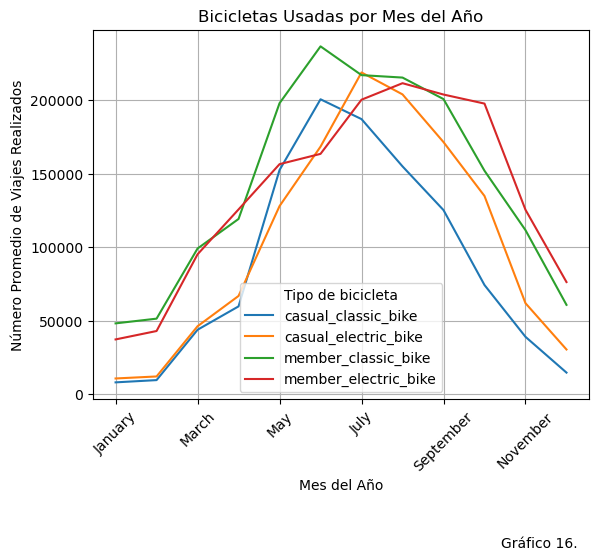


--> Bicicletas Usadas por Mes del Año

+-----------+-----------------------+------------------------+-----------------------+------------------------+
| month     | casual_classic_bike   | casual_electric_bike   | member_classic_bike   | member_electric_bike   |
+===========+=======================+========================+=======================+========================+
| January   | 7,935                 | 10,585                 | 48,093                | 37,157                 |
+-----------+-----------------------+------------------------+-----------------------+------------------------+
| February  | 9,468                 | 11,948                 | 51,307                | 42,886                 |
+-----------+-----------------------+------------------------+-----------------------+------------------------+
| March     | 43,744                | 46,136                 | 99,052                | 95,108                 |
+-----------+-----------------------+------------------------+--

In [3]:
import matplotlib.pyplot as plt

# Agrupar por 'month' y 'bike_type', y contar las ocurrencias
monthly_bike_usage = trips.groupby(['month', 'user_type', 'bike_type'], observed=False).size()

unstacked = monthly_bike_usage.unstack(level=['user_type', 'bike_type'])

# Renombrar las columnas 
unstacked.columns = ['_'.join(col).strip() for col in unstacked.columns.values]

# Reordenar los días de la semana
months_of_the_year = ["January", "February", "March", "April", "May", "June", 
                      "July", "August", "September", "October", "November", "December"]

unstacked = unstacked.reindex(months_of_the_year)

# Crear la gráfica de líneas
unstacked.plot(kind='line')
plt.title('Bicicletas Usadas por Mes del Año')
plt.xlabel('Mes del Año')
plt.ylabel('Número Promedio de Viajes Realizados')
plt.legend(title='Tipo de bicicleta')
plt.xticks(rotation=45)
plt.grid(True)

# Etiqueta gráfico 16 
plt.text(x=0.9, y=-0.4, s= f'Gráfico 16.', fontsize=10, ha='center', transform=plt.gca().transAxes)
plt.show()

from tabulate import tabulate
# Formatear las columnas numéricas para usar separadores de miles
for col in unstacked.columns:
    unstacked[col] = unstacked[col].apply(lambda x: "{:,}".format(int(x)).rjust(15))
print()
print("--> Bicicletas Usadas por Mes del Año\n")
# Mostrar el resultado usando tabulate
print(tabulate(unstacked, headers='keys', tablefmt='grid', showindex=True))

texto = "Tabla 3."
print()
print(texto.rjust(100))  # Alinea a la derecha en un espacio de 100 caracteres
print()

**Uso Anticipado y Significativo de Bicicletas Clásicas**

Nótese que, para ambos usuarios, el uso de la bicicleta clásica comienza su ascenso hacia el pico del verano un mes antes que el de las bicicletas eléctricas. Esto pudiera deberse a diversas razones:

* Transición Climática: El inicio de la primavera puede motivar a los usuarios a comenzar a usar bicicletas más temprano en el año, optando por bicicletas clásicas inicialmente debido a su simplicidad y la percepción de un inicio "fresco" después del invierno.

* Actividad Física: Después del invierno, puede haber un deseo de actividad física más intensa para disfrutar del aire libre, lo que hace que las bicicletas clásicas sean atractivas por su naturaleza más activa y la oportunidad de ejercicio que ofrecen.

* Disponibilidad y Costo: Es posible que al inicio de la temporada de ciclismo, la disponibilidad de bicicletas eléctricas sea más limitada o que los usuarios sean más conscientes del costo, prefiriendo bicicletas clásicas como una opción más económica mientras se adaptan a un patrón regular de uso.


**Usuarios Casuales y la Disminución Post-Verano**

* Nótese que el uso de las bicicletas por parte de los **usuarios casuales** presenta una **disminución más pronunciada** una vez pasados los picos de la temporada alta (verano).

* La disminución más pronunciada en el uso de bicicletas por parte de los usuarios casuales tras el verano puede estar influenciada por varios factores, incluyendo la vuelta a las rutinas escolares y laborales, y una menor predisposición a actividades recreativas al aire libre a medida que el clima se vuelve más frío. Este comportamiento sugiere que el ciclismo para usuarios casuales está más ligado a actividades de ocio que dependen significativamente de las condiciones climáticas favorables.


**Usuarios Miembros y la Extensión del Uso de Bicicletas**

Nótese que por su parte, los **usuarios miembros**, aunque a la baja en el uso de las bicicletas despues de los picos del verano, parecen querer 'estirar' el verano con una **disminución muy ligera** que se extiende hasta septiembre, para el caso de las bicicletas clásicas, y hasta octubre, para el caso de las bicicletas eléctricas.

* Esta disminución más gradual en el uso de bicicletas clásicas y eléctricas tras los picos del verano indica una integración más profunda del ciclismo en sus rutinas diarias. Este grupo parece más dispuesto o capaz de "estirar" la temporada de ciclismo, posiblemente debido a un mayor compromiso con el ciclismo como medio de transporte sostenible, independientemente de las variaciones estacionales. 

* La disminución ligera y extendida en el uso podría reflejar una mayor tolerancia a las condiciones climáticas cambiantes o un esfuerzo por mantener hábitos de ciclismo saludables y sostenibles.


**Estrategias Diferenciadas de Promoción y Soporte:**

Eventos y Turismo: La programación de eventos al aire libre y el turismo pueden influir en el tipo de bicicleta elegida. Los meses de verano y otoño a menudo presentan una agenda más completa de actividades, lo que podría explicar el aumento en el uso de bicicletas eléctricas, especialmente por su conveniencia en trayectos largos o turísticos.

Cambio en las Necesidades de Movilidad: A medida que las personas ajustan sus rutinas a lo largo del año, también pueden cambiar sus preferencias de movilidad, inclinándose hacia las bicicletas eléctricas para un desplazamiento más cómodo y eficiente en momentos específicos del año.

Las diferencias en el comportamiento de uso entre usuarios casuales y miembros destacan la necesidad de estrategias diferenciadas para promover el uso de bicicletas en la transición del verano al otoño. Para los miembros, podría ser beneficioso ofrecer incentivos o programas que fomenten el uso continuado de bicicletas a medida que el clima se enfría, como información sobre rutas óptimas para el clima frío o talleres sobre ciclismo en condiciones otoñales. Para los usuarios casuales, las campañas de verano podrían enfocarse en maximizar el aprovechamiento de las condiciones climáticas ideales, mientras que en el otoño, se podrían promover eventos específicos que animen a usar bicicletas para asistir.

Esta interpretación subraya la importancia de entender las motivaciones y barreras para el uso de bicicletas compartidas a lo largo de diferentes temporadas, permitiendo así ajustar los servicios y comunicaciones para alentar un uso más extendido y sostenible de las bicicletas Divvy a lo largo del año.

## 12. Duración de los Viajes en Bicicleta

**Introducción** 

Antes de adentrarnos en el análisis detallado de la duración de los viajes en bicicleta y su impacto en los patrones de uso entre los diferentes tipos de usuarios de Divvy, es esencial comprender las modalidades de viaje disponibles y las tarifas asociadas a cada una. Divvy ofrece opciones distintas para usuarios casuales y miembros, con tarifas que varían según el tipo de bicicleta seleccionada (clásica o eléctrica) y la duración del viaje. Estas diferencias en las modalidades de viaje y estructuras de tarifas no solo influyen en las decisiones de los usuarios al elegir Divvy para sus desplazamientos sino que también pueden afectar la duración y la frecuencia de los viajes. Por tanto, este conocimiento previo nos permitirá realizar un análisis más informado sobre cómo las políticas de precios y accesibilidad impactan en el comportamiento de los usuarios, facilitando la identificación de oportunidades para mejorar la experiencia del servicio y su eficiencia operativa.

**Usuarios Casuales vs. Miembros**

* Usuarios Casuales tienen la flexibilidad de optar por viajes individuales o pases diarios, con tarifas que se calculan por minuto después de una tarifa inicial de liberación de la bicicleta. Esta opción es ideal para turistas o usuarios esporádicos que buscan conveniencia sin compromiso a largo plazo.

* Usuarios Miembros disfrutan de beneficios a través de la membresía anual, que incluye viajes ilimitados de hasta 45 minutos sin costos adicionales para bicicletas clásicas, y una estructura de tarifas reducida para bicicletas eléctricas. Esta modalidad está diseñada para usuarios regulares que buscan maximizar el valor a lo largo del tiempo.

Ambas modalidades enfrentan penalizaciones por bicicletas no devueltas dentro de las 24 horas, consideradas como extraviadas o robadas, lo que añade una capa adicional de responsabilidad sobre los usuarios.

Con este panorama de modalidades y tarifas, nuestro análisis buscará profundizar en cómo estas opciones afectan la duración y las preferencias de viaje entre los usuarios casuales y miembros, proporcionando así insights valiosos para la toma de decisiones estratégicas por parte de Divvy.

**Resumen de Modalidades y Tarifas**

**Usuarios Casuales:**
- **Single Ride:**
  - Classic bike: \\$1 para liberar la bicicleta + \$0.18/minuto.
  - Electric bike: \\$1 para liberar la bicicleta + \$0.44/minuto.
- **Day Pass:**
  - Classic bike: \\$18.10 por día, viajes de 3 horas ilimitados + \$0.18/minuto extra.
  - Electric bike: \\$18.10 por día, sin cargos por liberación + \$0.44/minuto.

**Usuarios Miembros:**
- **Membresía Anual:** \$143.9 por año
  - Classic bike: Viajes sin costo de 45 minutos ilimitados + \$0.18/minuto extra.
  - Electric bike: Sin cargos por liberación + \$0.18/minuto.

**Consideraciones Extras:**
- Bicicletas no devueltas en un plazo de 24 horas se consideran extraviadas o robadas, con una multa de \$1200.


### Análisis de la Duración de los Viajes en Bicicleta

Después de comprender las diferentes tarifas y modalidades ofrecidas por Divvy a sus usuarios, tanto casuales como miembros, nos enfocaremos ahora en analizar la duración de los viajes en bicicleta. Este análisis nos permitirá descubrir patrones de uso y preferencias entre los dos tipos de usuarios, además de entender cómo la elección del tipo de bicicleta (clásica o eléctrica) puede influir en la duración de los viajes. Estos insights serán fundamentales para tomar decisiones estratégicas orientadas a mejorar la experiencia del usuario y la eficiencia del servicio ofrecido por Divvy.

**Objetivos Específicos:**

* Identificar Patrones de Uso: Analizaremos la duración promedio de los viajes para usuarios casuales y miembros, buscando tendencias que nos permitan entender sus comportamientos de viaje distintivos.

* Comprender Preferencias de Viaje: Exploraremos cómo la selección entre bicicletas clásicas y eléctricas afecta la duración de los viajes. Esto nos ayudará a identificar si existen diferencias significativas en las necesidades y preferencias de los usuarios, según el tipo de bicicleta elegida.

* Impacto en la Planificación y Servicios: Utilizaremos los hallazgos de este análisis para proponer ajustes en la disponibilidad de bicicletas, estaciones, y programas de membresía. El objetivo es mejorar la satisfacción del usuario y optimizar la operación del servicio.

**Metodología de Análisis:**
Para lograr nuestros objetivos, emplearemos un enfoque metodológico que incluye:

* Análisis Descriptivo: Nos centraremos en las métricas de duración de los viajes, como trip_minutes y trip_hours, calculando estadísticas descriptivas básicas (media, mediana, desviación estándar, y rangos intercuartílicos). Este análisis también considerará la detección y manejo de valores extremos para asegurar una interpretación precisa de los datos.

* Comparación entre Grupos: Realizaremos una comparación directa de las duraciones de los viajes entre usuarios casuales y miembros, así como entre los tipos de bicicletas (clásicas y eléctricas), para identificar diferencias significativas en sus patrones de uso.

Cada paso de este análisis se documentará detalladamente, incluyendo justificaciones para las decisiones tomadas y la interpretación de los resultados obtenidos. Las visualizaciones de datos, como gráficos y tablas, complementarán nuestra exploración de los datos, facilitando la comprensión de los patrones identificados.

In [1]:
import pandas as pd
trips = pd.read_parquet("trips_2022_clean_2.parquet")

### 12.1 Análisis Descriptivo de las métricas de duración de los viajes

Para iniciar el análisis sobre la duración de los viajes en bicicleta con el servicio Divvy, nos enfocaremos primero en el Análisis Descriptivo de las métricas de duración de los viajes, específicamente trip_minutes y trip_hours. Este análisis inicial nos proporcionará una visión clara de cómo se distribuyen las duraciones de los viajes entre todos los usuarios, preparando el terreno para comparaciones más detalladas entre grupos de interés (usuarios casuales vs. miembros y bicicletas clásicas vs. eléctricas).

**Análisis Descriptivo**

* Objetivo: Obtener un entendimiento básico de la distribución de las duraciones de los viajes en el conjunto de datos de Divvy.

* Procedimiento:

  - Cálculo de Estadísticas Descriptivas: Empezaremos calculando estadísticas descriptivas básicas para trip_minutes y trip_hours que incluyen la media, mediana, desviación estándar, y rangos intercuartílicos (Q1, Q3). Esto nos dará una idea de la duración típica de los viajes, así como la variabilidad en las duraciones.

  - Identificación y Manejo de Valores Extremos: Los valores extremos pueden distorsionar nuestras estadísticas descriptivas y visualizaciones. Identificaremos estos valores usando el método de rango intercuartílico (IQR) y decidiremos cómo manejarlos, ya sea excluyéndolos del análisis subsiguiente o ajustándolos.

  - Visualización de la Distribución de Duraciones: Utilizaremos histogramas y boxplots para visualizar la distribución de trip_minutes y trip_hours. Esto nos ayudará a comprender mejor la forma de la distribución y a identificar cualquier patrón o anomalía, como sesgos o la presencia de múltiples modas.

* Justificación: Este paso inicial es crucial para cualquier análisis de datos ya que proporciona una base sólida sobre la cual podemos construir interpretaciones y comparaciones más complejas. Entender la distribución de las duraciones de los viajes nos permite identificar patrones de uso general y prepara el escenario para análisis más detallados.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

print()

# Cálculo de estadísticas descriptivas
# Para incluir también los percentiles 25 y 75 (Q1 y Q3)
descriptive_stats_with_percentiles = trips[['trip_minutes', 'trip_hours']].describe(percentiles=[.1, .2, .3,
                                                                                                 .4, .5, .6,
                                                                                                .7, .8, .9])


# Imprimir título de tabla y tabla 
titulo = "Estadísticas Descriptivas de Duración de Viajes"
display(HTML(f"<h4 style='text-align: left;'>{titulo}</h4>"))
print()
print(descriptive_stats_with_percentiles.to_markdown(tablefmt="mixed_grid", numalign="right", floatfmt=".2f"))

texto = "Tabla 4."
print()
print(texto.rjust(45))
print()


┍━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━┑
│       │   trip_minutes │   trip_hours │
┝━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━┥
│ count │     5667617.00 │   5667617.00 │
├───────┼────────────────┼──────────────┤
│ mean  │          19.45 │         0.32 │
├───────┼────────────────┼──────────────┤
│ std   │         176.08 │         2.93 │
├───────┼────────────────┼──────────────┤
│ min   │           0.00 │         0.00 │
├───────┼────────────────┼──────────────┤
│ 10%   │           3.43 │         0.06 │
├───────┼────────────────┼──────────────┤
│ 20%   │           5.05 │         0.08 │
├───────┼────────────────┼──────────────┤
│ 30%   │           6.60 │         0.11 │
├───────┼────────────────┼──────────────┤
│ 40%   │           8.30 │         0.14 │
├───────┼────────────────┼──────────────┤
│ 50%   │          10.28 │         0.17 │
├───────┼────────────────┼──────────────┤
│ 60%   │          12.77 │         0.21 │
├───────┼────────────────┼──────────────┤
│ 70%   │          16.15 │       

**Distribución General**

* Rango Amplio: La duración de los viajes varía significativamente, desde un mínimo de 0 minutos hasta un máximo de aproximadamente 41,387 minutos (o aproximadamente 689 horas). Esto indica una amplia gama de comportamientos de viaje, desde viajes extremadamente cortos hasta algunos inusualmente largos.
  
* Desviación Estándar Grande: Una desviación estándar de 176.08 minutos para trip_minutes y 2.93 horas para trip_hours sugiere una gran variabilidad en la duración de los viajes. La presencia de viajes muy largos contribuye a esta alta variabilidad.
  
**Tendencias Centrales y Dispersión**

* Media vs. Mediana: La media de la duración de los viajes es de aproximadamente 19.45 minutos, mientras que la mediana es de 10.28 minutos. La diferencia significativa entre estas dos medidas indica una distribución sesgada con una cola larga de valores más altos. La mediana más baja sugiere que la mayoría de los viajes son relativamente cortos, pero algunos viajes extremadamente largos aumentan la media.

* Percentiles: Observando los percentiles, podemos ver que el 90% de los viajes duran 31.95 minutos o menos, lo que refuerza la idea de que la mayoría de los viajes son cortos. Sin embargo, existe un salto considerable en la duración máxima, lo que indica la presencia de outliers.

**Outliers (Valores Atípicos)**

* Valores Extremos: La existencia de un viaje máximo de más de 41,387 minutos (689.79 horas) es notable y sugiere la presencia de valores atípicos extremos. Estos valores pueden ser el resultado de errores en los datos, bicicletas no devueltas correctamente, o viajes inusualmente largos por razones específicas. Algo similar sucede en el otro extremo con viajes de cero minutos. 

**Implicaciones y Siguientes Pasos**

* Manejo de Outliers: Sería prudente investigar y posiblemente excluir los valores extremos antes de realizar análisis adicionales, especialmente si se busca entender el comportamiento típico de los usuarios o optimizar el servicio de bicicletas compartidas.

* Análisis de Duración de Viajes: El análisis sugiere que, para la mayoría de los usuarios, los viajes son de corta duración. Esta información puede ser útil para Divvy al considerar la distribución de estaciones de bicicletas y al planificar la capacidad de servicio.

* Segmentación de Usuarios: Sería interesante segmentar aún más el análisis por tipo de usuario (miembros vs. usuarios casuales) y por tipo de bicicleta (clásicas vs. eléctricas) para entender cómo estas variables afectan la duración de los viajes.

### --> Identificación de Viajes Atípicos por Duración Alta

In [61]:
# Cálculo de estadísticas descriptivas
# Para incluir también los percentiles 25 y 75 (Q1 y Q3)
descriptive_stats_with_percentiles = trips[['trip_minutes', 'trip_hours']].describe(percentiles=[.90, .91, .92, .93,
                                                                                                .94, .95, .96, .98,
                                                                                                .990, .991, .992,
                                                                                                .993, .994, .995,
                                                                                                .996, .997, .998,
                                                                                                .999])

# Imprimir título de tabla y tabla 
titulo = "Estadísticas Descriptivas de Duración de Viajes"
subtitulo = "(para los valores extremos más altos)"
display(HTML(f"<h4 style='text-align: left;'>{titulo}</h4>"))
display(HTML(f"<h5 style='text-align: left;'>{subtitulo}</h5>"))
print()
print(descriptive_stats_with_percentiles.to_markdown(tablefmt="mixed_grid", numalign="right", floatfmt=".2f"))

texto = "Tabla 5."
print()
print(texto.rjust(45))
print()


┍━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━┑
│       │   trip_minutes │   trip_hours │
┝━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━┥
│ count │     5667617.00 │   5667617.00 │
├───────┼────────────────┼──────────────┤
│ mean  │          19.45 │         0.32 │
├───────┼────────────────┼──────────────┤
│ std   │         176.08 │         2.93 │
├───────┼────────────────┼──────────────┤
│ min   │           0.00 │         0.00 │
├───────┼────────────────┼──────────────┤
│ 50%   │          10.28 │         0.17 │
├───────┼────────────────┼──────────────┤
│ 90%   │          31.95 │         0.53 │
├───────┼────────────────┼──────────────┤
│ 91%   │          33.77 │         0.56 │
├───────┼────────────────┼──────────────┤
│ 92%   │          35.90 │         0.60 │
├───────┼────────────────┼──────────────┤
│ 93%   │          38.38 │         0.64 │
├───────┼────────────────┼──────────────┤
│ 94%   │          41.43 │         0.69 │
├───────┼────────────────┼──────────────┤
│ 95%   │          45.37 │       

Analizando la Tabla 5 sobre las estadísticas descriptivas de duración de los viajes del servicio Divvy, se observa un incremento gradual en la duración de los viajes hasta el percentil 99.8%, reflejando el comportamiento típico de los usuarios. Este patrón cambia drásticamente en el percentil 99.9%, donde la duración salta significativamente, sugiriendo la presencia de outliers. Dada esta evidencia, **decidimos considerar como atípicos los viajes con duraciones mayores a 291.91 minutos**. Este umbral excluye los extremos más significativos, permitiendo enfocar el análisis en el uso representativo del servicio y evitando distorsiones por valores extremadamente atípicos.

La decisión de considerar viajes con duraciones mayores a 291.91 minutos como outliers se justifica ampliamente por el análisis de los percentiles y el patrón de crecimiento en las duraciones de los viajes. Este enfoque equilibra la inclusión de la mayoría de los viajes que reflejan el uso estándar del servicio de bicicletas compartidas, al mismo tiempo que limita la influencia de los valores extremadamente atípicos que podrían distorsionar el análisis y la comprensión del comportamiento de los usuarios. Este criterio asegura que el análisis se centre en los patrones de viaje más relevantes y representativos, proporcionando una base sólida para decisiones operativas y estratégicas informadas.

#### Identificación de Viajes con Duraciones Altas Y Extremas Consideradas Outliers

Veamos cuántos de estos 'outliers' pertenecen a cada tipo de bicicleta y a cada tipo de usuario:

In [3]:
import pandas as pd
import numpy as np

# 1. --> Función para Imprimir título y subtítulo de tabla utilizando HTML
                            
from IPython.display import HTML, display

def imprime_titulo(titulo, subtitulo=None):
    display(HTML(f"<h4 style='text-align: left;'>{titulo}</h4>"))
    if subtitulo:
        display(HTML(f"<h5 style='text-align: left;'>{subtitulo}</h5>"))
    print()
                             # FIN 1. #

# 2. --> Función para convertir dataframe a markdown, imprimir observaciones, tabla y numeración de tabla

from tabulate import tabulate

def imprime_tabla_con_observaciones(df, numeracion_tabla, observacion1=None, observacion2=None):
    # Generar la tabla en formato Markdown
    tabla_markdown = df.to_markdown(tablefmt="grid", numalign="right", floatfmt=".2f")
    
    # Imprimir observaciones si se proporcionan
    if observacion1:
        print(observacion1)
    if observacion2:
        print(observacion2)
    
    # Imprimir la tabla
    print(f"\n{tabla_markdown}")
    
    # Calcular el ancho de la tabla y ajustar el espaciado de la numeración
    ancho_tabla = max(len(linea) for linea in tabla_markdown.split('\n'))
    espaciado = max(ancho_tabla - len(numeracion_tabla), 0)  # Asegurar que el espaciado no sea negativo
    
    # Imprimir la numeración de la tabla, alineada a la derecha
    print(f"{' ' * espaciado}{numeracion_tabla}")

                                ##  FIN 2. ##


# 3. --> Función para Segmentar los viajes por outliers según las duraciones

def segmentar_outliers(df, col_duracion, 
                       limite_inferior_1, limite_superior_1, limite_superior_2, 
                       etiqueta_inferior_1, etiqueta_superior_1, etiqueta_superior_2):
    
    df['outlier_segmento'] = np.where(df[col_duracion] > limite_superior_2, etiqueta_superior_2,
                                 np.where(df[col_duracion] >= limite_superior_1, etiqueta_superior_1, 
                                          np.where(df[col_duracion] >= limite_inferior_1, 'No Outlier', etiqueta_inferior_1)))

                                  ###   FIN  3. ###

# 4. --> Función para generar dataframe con conteo por segmento de outlier por tipo de usuario y/o tipo de bicicleta 

def generar_df_outliers(df, cols, segmentos):
    # Agrupar por las columnas especificadas y calcular el tamaño de cada grupo
    conteos = df.groupby(cols + ['outlier_segmento'], observed=False).size().unstack(fill_value=0)
    
    # Inicializar columnas de porcentaje en el DataFrame de conteos
    for segmento in segmentos:
        conteos[f'%_{segmento}'] = 0
    
    # Calcular el total de outliers para el tipo de agrupación
    total_outliers = conteos.sum(axis=1)
    
    # Calcular porcentajes para cada segmento de outliers
    for segmento in segmentos:
        if segmento in conteos.columns:
            conteos[f'%_{segmento}'] = (conteos[segmento] / total_outliers) * 100
    
    # Asegurarse de que el DataFrame final tenga el orden de columnas deseado
    columnas_ordenadas = [col for segmento in segmentos for col in (segmento, f'%_{segmento}') if col in conteos.columns]
    return conteos[columnas_ordenadas]

                                 ###   FIN  4. ###

# 5. --> Función para obtener_lista_de_segmentos_de_df_filtrado

def obtener_lista_de_segmentos_de_df_filtrado(df_filtrado):
    segmentos = df_filtrado['outlier_segmento'].unique()
    segmentos = segmentos.tolist()
    return segmentos

                                 ###   FIN  5. ###

############################################## Generar etiquetas de segmentos para tipo de outlier utilizando función #3. ####################

# Definir df y columna
df = trips
col_duracion = 'trip_minutes'

# Definir los límites de los segmentos
limite_inferior_1 = 1
limite_superior_1 = 291.91
limite_superior_2 = 24 * 60  # 24 horas convertidas a minutos

# Definir los nombres de las etiquetas para los segmentos
etiqueta_inferior_1 = 'Duraciones Bajas'
etiqueta_superior_1 = 'Duraciones Altas'
etiqueta_superior_2 = 'Duraciones Extremas'

# Segmentar los viajes por outliers según las duraciones
segmentar_outliers(df, col_duracion, 
                   limite_inferior_1, limite_superior_1, limite_superior_2, 
                   etiqueta_inferior_1, etiqueta_superior_1, etiqueta_superior_2)


In [155]:
################### Imprimir tabla con conteos de viajes por segmento de outlier según USER_TYPE ###########################

# Obtener dataframe filtrado que incluya solo outliers de límite superior
df_filtrado = trips[(trips['outlier_segmento'] == 'Duraciones Altas') | (trips['outlier_segmento'] == 'Duraciones Extremas')]

### Obtener dataframe con conteos de outliers del dataframe filtrado para user_type y/ o bike_type
# --> Definiendo parámetros
df_filtrado = df_filtrado
cols = ['user_type']
segmentos = obtener_lista_de_segmentos_de_df_filtrado(df_filtrado)

# --> obteniendo dataframe con la función generar_df_outliers: 
df_para_imprimir = generar_df_outliers(df_filtrado, cols, segmentos)

### Imprimir el dataframe con los conteos en formato tabla con título, y numeración de tabla 
# --> Definir título y subtítulo de la tabla 
titulo = "Análisis de Duraciones de Viajes con valores OUTLIERS en el EXTREMO SUPERIOR"
subtitulo = "(por TIPO DE USUARIO y duración)"

# --> Definir observaciones (descripción de categorias), dataframe a convertir a tabla y número de tabla 
df = df_para_imprimir
numeracion_tabla = "Tabla 6."
observacion1 = "Duraciones Altas: valores en rango 291.91 minutos - 1440 minutos (24 horas)"
observacion2 = "Duraciones Extremas: valores mayores a 24 horas"

# --> Imprimir 
imprime_titulo(titulo, subtitulo)
imprime_tabla_con_observaciones(df, numeracion_tabla, observacion1, observacion2)


Duraciones Altas: valores en rango 291.91 minutos - 1440 minutos (24 horas)
Duraciones Extremas: valores mayores a 24 horas

+-------------+--------------------+----------------------+-----------------------+-------------------------+
| user_type   |   Duraciones Altas |   %_Duraciones Altas |   Duraciones Extremas |   %_Duraciones Extremas |
+=============+====================+======================+=======================+=========================+
| casual      |            4359.00 |                48.42 |               4644.00 |                   51.58 |
+-------------+--------------------+----------------------+-----------------------+-------------------------+
| member      |            1617.00 |                69.31 |                716.00 |                   30.69 |
+-------------+--------------------+----------------------+-----------------------+-------------------------+
                                                                                                     Tab

In [154]:
################### Imprimir tabla con conteos de viajes por segmento de outlier según USER_TYPE ###########################

# Obtener dataframe filtrado que incluya solo outliers de límite superior
df_filtrado = trips[(trips['outlier_segmento'] == 'Duraciones Altas') | (trips['outlier_segmento'] == 'Duraciones Extremas')]

### Obtener dataframe con conteos de outliers del dataframe filtrado para user_type y/ o bike_type
# --> Definiendo parámetros
df_filtrado = df_filtrado
cols = ['bike_type']
segmentos = obtener_lista_de_segmentos_de_df_filtrado(df_filtrado)

# --> obteniendo dataframe con la función generar_df_outliers: 
df_para_imprimir = generar_df_outliers(df_filtrado, cols, segmentos)

### Imprimir el dataframe con los conteos en formato tabla con título, y numeración de tabla 
# --> Definir título y subtítulo de la tabla 
titulo = "Análisis de Duraciones de Viajes con valores OUTLIERS en el EXTREMO SUPERIOR"
subtitulo = "(por TIPO DE BICICLETA y duración)"

# --> Definir observaciones (descripción de categorias), dataframe a convertir a tabla y número de tabla 
df = df_para_imprimir
numeracion_tabla = "Tabla 7."
observacion1 = "Duraciones Altas: valores en rango 291.91 minutos - 1440 minutos (24 horas)"
observacion2 = "Duraciones Extremas: valores mayores a 24 horas"

# --> Imprimir 
imprime_titulo(titulo, subtitulo)
imprime_tabla_con_observaciones(df, numeracion_tabla, observacion1, observacion2)


Duraciones Altas: valores en rango 291.91 minutos - 1440 minutos (24 horas)
Duraciones Extremas: valores mayores a 24 horas

+---------------+--------------------+----------------------+-----------------------+-------------------------+
| bike_type     |   Duraciones Altas |   %_Duraciones Altas |   Duraciones Extremas |   %_Duraciones Extremas |
+===============+====================+======================+=======================+=========================+
| classic_bike  |            5276.00 |                49.61 |               5360.00 |                   50.39 |
+---------------+--------------------+----------------------+-----------------------+-------------------------+
| electric_bike |             700.00 |               100.00 |                  0.00 |                    0.00 |
+---------------+--------------------+----------------------+-----------------------+-------------------------+
                                                                                          

In [153]:
################### Imprimir tabla con conteos de viajes por segmento de outlier según USER_TYPE ###########################

# Obtener dataframe filtrado que incluya solo outliers de límite superior
df_filtrado = trips[(trips['outlier_segmento'] == 'Duraciones Altas') | (trips['outlier_segmento'] == 'Duraciones Extremas')]

### Obtener dataframe con conteos de outliers del dataframe filtrado para user_type y/ o bike_type
# --> Definiendo parámetros
df_filtrado = df_filtrado
cols = ['user_type', 'bike_type']
segmentos = obtener_lista_de_segmentos_de_df_filtrado(df_filtrado)

# --> obteniendo dataframe con la función generar_df_outliers: 
df_para_imprimir = generar_df_outliers(df_filtrado, cols, segmentos)

### Imprimir el dataframe con los conteos en formato tabla con título, y numeración de tabla 
# --> Definir título y subtítulo de la tabla 
titulo = "Análisis de Duraciones de Viajes con valores OUTLIERS en el EXTREMO SUPERIOR"
subtitulo = "(por TIPO DE USUARIO - TIPO DE BICICLETA y duración)"

# --> Definir observaciones (descripción de categorias), dataframe a convertir a tabla y número de tabla 
df = df_para_imprimir
numeracion_tabla = "Tabla 8."
observacion1 = "Duraciones Altas: valores en rango 291.91 minutos - 1440 minutos (24 horas)"
observacion2 = "Duraciones Extremas: valores mayores a 24 horas"

# --> Imprimir 
imprime_titulo(titulo, subtitulo)
imprime_tabla_con_observaciones(df, numeracion_tabla, observacion1, observacion2)


Duraciones Altas: valores en rango 291.91 minutos - 1440 minutos (24 horas)
Duraciones Extremas: valores mayores a 24 horas

+-----------------------------+--------------------+----------------------+-----------------------+-------------------------+
|                             |   Duraciones Altas |   %_Duraciones Altas |   Duraciones Extremas |   %_Duraciones Extremas |
+=============================+====================+======================+=======================+=========================+
| ('casual', 'classic_bike')  |            4172.00 |                47.32 |               4644.00 |                   52.68 |
+-----------------------------+--------------------+----------------------+-----------------------+-------------------------+
| ('casual', 'electric_bike') |             187.00 |               100.00 |                  0.00 |                    0.00 |
+-----------------------------+--------------------+----------------------+-----------------------+-------------------

El análisis de los viajes considerados como outliers por su duración extrema en el servicio de bicicletas compartidas Divvy revela insights cruciales sobre el comportamiento de los usuarios y el uso de las bicicletas. Este análisis, detallado en las Tablas 6, 7 y 8, se enfoca en las duraciones altas y extremas, definidas como aquellas que superan los 291.91 minutos y las 24 horas, respectivamente.

**Interpretaciones Basadas en las Modalidades y Tarifas de Divvy:**

* Duraciones Altas vs. Extremas: La distinción entre duraciones altas y extremas refleja directamente las políticas de Divvy respecto a las bicicletas no devueltas en 24 horas, considerándolas como extraviadas o robadas y sujetas a multas significativas. Este umbral podría explicar por qué ciertos viajes se acercan pero no exceden las 24 horas, sugiriendo una posible conciencia de las tarifas y penalizaciones.

* Usuarios Casuales y Miembros: La Tabla 6 muestra una distribución casi equitativa entre las duraciones altas y extremas para los usuarios casuales, contrastando con una mayor proporción de viajes de duración alta entre los miembros. Esto podría reflejar diferencias en el conocimiento o la atención a las políticas de tarifas entre los dos tipos de usuarios, donde los miembros, potencialmente más familiarizados con el sistema, evitan incurrir en cargos adicionales.

* Impacto del Tipo de Bicicleta: Según la Tabla 7, los viajes en bicicletas eléctricas outliers se limitan exclusivamente a duraciones altas (ver nota 1), sin registros de duraciones extremas. Este patrón podría estar influenciado por la estructura de tarifas de Divvy para bicicletas eléctricas, que incluye costos adicionales por minuto que podrían desincentivar su uso para viajes extremadamente largos.

* Combinación de Tipo de Usuario y Tipo de Bicicleta: La Tabla 8 revela que, independientemente del tipo de bicicleta, los usuarios casuales tienen una mayor propensión a realizar viajes de duración extrema en comparación con los miembros. Esto subraya cómo las diferentes modalidades de uso y las tarifas asociadas pueden impactar el comportamiento de los usuarios en el sistema de bicicletas compartidas.

**Nota 1:**

El análisis de los viajes outliers en bicicletas eléctricas de Divvy revela un patrón intrigante: todos los viajes clasificados como outliers en bicicletas eléctricas caen exclusivamente dentro del rango de "Duraciones Altas", sin incidencias de "Duraciones Extremas" que sugieran bicicletas consideradas como extraviadas o robadas según las políticas de Divvy. Este fenómeno podría ser una indicación de que las bicicletas eléctricas están equipadas con sistemas avanzados de localización, permitiendo una recuperación más eficaz y disuadiendo el abuso o el uso indebido del servicio.

A diferencia de las bicicletas clásicas, donde la ausencia de registros de estación de finalización (end_station_name) o coordenadas de finalización (end_lat, end_lng) en viajes de larga duración podría indicar una bicicleta no devuelta correctamente, perdida o incluso robada, las bicicletas eléctricas presentan una tasa de cumplimiento del 100% en términos de tener coordenadas de finalización registradas. Esto sugiere que, independientemente de si un viaje termina en una estación oficial o no, las bicicletas eléctricas son rastreadas hasta su punto final de uso.

Este seguimiento efectivo probablemente actúa como un mecanismo disuasorio contra la retención indebida de las bicicletas más allá del periodo de alquiler y facilita la recuperación por parte de Divvy en casos de uso prolongado inadvertido o intencionado. Además, la estructura de tarifas para bicicletas eléctricas, que impone cargos adicionales por minuto, complementa este sistema al incentivar a los usuarios a devolver las bicicletas en tiempo para evitar cargos excesivos.

**Reflexión sobre Bicicletas Clásicas**

Para los viajes en bicicletas clásicas que exceden las duraciones típicas pero no cuentan con información de estación de finalización o coordenadas, se plantea un dilema. Si el tiempo registrado es exacto y la bicicleta se devolvió físicamente, la ausencia de datos de localización sugiere un fallo en el sistema de registro o en el proceso de devolución. Esto podría indicar la necesidad de mejorar los protocolos de seguimiento y devolución para bicicletas clásicas, asegurando que cada viaje se documente adecuadamente desde su inicio hasta su conclusión.

**Conclusión y Siguientes Pasos**

La distinción en el comportamiento de los viajes outliers entre bicicletas eléctricas y clásicas subraya la importancia de los sistemas de localización y las estrategias de tarificación en la gestión y operación de servicios de bicicletas compartidas. Para Divvy, esta información puede ser invaluable para:

* Reforzar los sistemas de seguimiento para todas las bicicletas, especialmente las clásicas, mejorando la precisión de los datos de localización y devolución.

* Revisar y posiblemente ajustar las políticas de tarificación y penalización para alentar la devolución oportuna y correcta de las bicicletas, minimizando así el riesgo de bicicletas perdidas o robadas.

* Considerar la implementación de tecnologías de localización en todas las bicicletas del servicio para garantizar un seguimiento efectivo y facilitar la recuperación de bicicletas no devueltas.



### Identificación de Viajes Atípicos por Duración Baja

In [157]:
# --> Definir título y subtítulo de la tabla 
titulo = "Estadísticas Descriptivas de Duración de Viajes"
subtitulo = "(para los valores EXTREMOS más BAJOS)"

# Imprimir título y subtítulo de la tabla 
imprime_titulo(titulo, subtitulo)

# Generación de dataframe con estadísticas descriptivas
descriptive_stats_with_percentiles = trips[['trip_minutes', 'trip_hours']].describe(percentiles=[.01, .02, .03, .04,
                                                                                                .05, .06])
# Convertir dataframe a tabla markdown
df_markdown = descriptive_stats_with_percentiles.to_markdown(tablefmt="mixed_grid", numalign="right", floatfmt=".2f")

# Imprimir tabla
print(df_markdown)

# ---> Asignar el número de tabla
numeracion_tabla = "Tabla 9."

# Calcular el ancho de la tabla y ajustar el espaciado de la numeración
ancho_tabla = max(len(linea) for linea in df_markdown.split('\n'))
espaciado = max(ancho_tabla - len(numeracion_tabla), 0)  # Asegurar que el espaciado no sea negativo

# Imprimir la numeración de la tabla, alineada a la derecha
print(f"{' ' * espaciado}{numeracion_tabla}")


┍━━━━━━━┯━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━┑
│       │   trip_minutes │   trip_hours │
┝━━━━━━━┿━━━━━━━━━━━━━━━━┿━━━━━━━━━━━━━━┥
│ count │     5667617.00 │   5667617.00 │
├───────┼────────────────┼──────────────┤
│ mean  │          19.45 │         0.32 │
├───────┼────────────────┼──────────────┤
│ std   │         176.08 │         2.93 │
├───────┼────────────────┼──────────────┤
│ min   │           0.00 │         0.00 │
├───────┼────────────────┼──────────────┤
│ 1%    │           0.33 │         0.01 │
├───────┼────────────────┼──────────────┤
│ 2%    │           0.88 │         0.01 │
├───────┼────────────────┼──────────────┤
│ 3%    │           1.58 │         0.03 │
├───────┼────────────────┼──────────────┤
│ 4%    │           2.02 │         0.03 │
├───────┼────────────────┼──────────────┤
│ 5%    │           2.35 │         0.04 │
├───────┼────────────────┼──────────────┤
│ 6%    │           2.60 │         0.04 │
├───────┼────────────────┼──────────────┤
│ 50%   │          10.28 │       

**Viajes de 0 Minutos:** Estos pueden ocurrir debido a errores en el registro de datos, usuarios que desbloquean una bicicleta y luego deciden no usarla, o posibles fallos técnicos. A menudo, estos viajes no representan un uso real del servicio y podrían ser excluidos del análisis de comportamiento típico del usuario.

**Viajes Menores a 1 Minuto:** Aunque algunos de estos viajes podrían ser legítimos, especialmente en áreas muy congestionadas o si el usuario inmediatamente se da cuenta de que ha elegido la bicicleta equivocada, una gran cantidad de viajes en esta categoría podría indicar problemas similares a los de los viajes de 0 minutos.

**Criterios para Etiquetar un Viaje como Atípico por Duración Baja**

* Sin Considerar la Distancia: Si no se considera la distancia recorrida, un criterio preliminar podría ser establecer un umbral mínimo de duración basado en el entendimiento operacional del servicio. Por ejemplo, cualquier viaje de menos de 2 minutos podría ser inicialmente considerado atípico, asumiendo que la mayoría de los usuarios necesitarían más tiempo para un viaje significativo.

* Considerando la Distancia: Idealmente, la distancia recorrida proporcionaría un mejor criterio para identificar viajes atípicos, ya que un viaje muy corto en duración pero con una distancia razonable podría indicar un error en el registro del tiempo más que un uso atípico. Sin embargo, sin considerar la distancia, el criterio se basaría puramente en la duración.

**Umbral para Viajes Atípicos sin Considerar la Distancia**

Estableciendo un Umbral: Un umbral razonable para viajes atípicos sin considerar la distancia podría ser cualquier viaje menor a 1 o 2 minutos. Este umbral puede ajustarse según el análisis de la distribución de las duraciones de los viajes y el conocimiento del comportamiento típico del usuario. Por ejemplo, si un análisis preliminar muestra que una proporción insignificante de viajes dura menos de 2 minutos, este podría ser un umbral práctico para identificar outliers.

**Conclusión**
La determinación de qué constituye un viaje atípico por duración baja depende en gran medida del contexto específico del servicio de bicicletas compartidas, incluidas las operaciones habituales y el comportamiento del usuario. La combinación de un análisis descriptivo detallado y el conocimiento operativo del sistema Divvy permitiría establecer los criterios más adecuados para filtrar estos outliers y así concentrarse en los patrones de uso más representativos.

**-->** Nosotros consideraremos como outliers, por lo pronto, los viajes menores a 1 minuto.

### Limpieza de Outliers

Hasta el momento se ha determinado considerar como outliers los viajes: 

* Menores a 1 minuto
* Iguales o mayores a 291.91 minutos

Para documentar, contabilizar y caracterizar los viajes con valores de duración considerados outliers, se creó la columna 'outlier_segmento' con 4 categorías: 

* 'Duraciones Bajas' ----> Viajes con duraciones menores a 1 minuto
* 'Duraciones Altas' ----> Viajes con duraciones iguales o mayores a 291.91 minutos & iguales o menores a 24 horas
* 'Duraciones Extremas'--> Viajes con duraciones mayores a 24 horas
* 'No Outlier' ----------> Viajes en medio de los rangos arriba mencionados

Ahora procederemos a filtrar el dataframe utilizando la categoría de 'No Outlier' por la columna 'outlier_segmento': 

In [4]:
df_no_outliers = trips[trips['outlier_segmento'] == 'No Outlier'].copy()
num_registros_trips = len(trips)
num_registros_despues_de_filtrar = len(df_no_outliers) 
print(f"Número de registros antes de filtrar: {num_registros_trips:,}")
print(f"Número de registros ahora: {num_registros_despues_de_filtrar:,}")

Número de registros antes de filtrar: 5,667,617
Número de registros ahora: 5,535,292


Alrededor de 130 mil registros fueron removidos. 

Ahora la columna 'outlier_segmento' no nos es de utilidad y la eliminaremos.

Tras esto exportaremos nuestro dataframe como trips_2022_clean_3 y pasaremos al punto 13. Distancias de los Viajes. 

In [5]:
df_no_outliers.drop('outlier_segmento', axis=1, inplace=True)
df_no_outliers.to_parquet("trips_2022_clean_3")